<a href="https://colab.research.google.com/github/TheLeveyBreaks/Foundations-of-Machine-Learning/blob/eda_hw_3/Foundations_of_Machine_Learning_Titanic_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Foundations of Machine Learning Project: Titanic Data Set**

## Background:

On the night of April 15th, 1912, the "unsinkable" RMS Titanic sank after colliding with an iceberg during her main voyage.

Because the White Star Line, the shipping line that opperated the Titanic, wanted to provide unbstructed views for 1st class passengers, the origional design of 64 life boats was cut down to 20 life boats. In total, this could accommodate 1,178 people, a little over half on board the night the Titanic sank.

This fatal mistake resulted in the death of 67.5% of the passengers on the night of the distaster. This number was further exacurbated as only 18 lifeboats were used, and many lifeboats only carried a fraction of their maximum capacity.

There are many variations as to why many life boats were not filled to capacity:
- Some sources claimed that the passengers were afraid of the lifeboat buckling under the weight.
- Others suggested that the crew were following orders to evacuate women and children first.

It is also worth noting that only two lifeboats returned to retrieve survivors, as the other lifeboats feared of being swamped with survivors or being sucked into the Titanic sinking.


The data being used for this project is derived from the Kaggle Data set. It is worth noting in the kaggle dataset, it states that 1502 passangers out of 2224 perished, while other estimates have 1,517 lives lost. From the Kaggle Estimate, this results in 722 survivors while other estimates have about 706 survivors.

For consistency, this project will be using the Kaggle estimate in providing results for this project.







## Project Description:

This project serves answer the question: **What is the likelyhood of a passengers survival?** Given the emergancy protocal taken, and the design choice of limiting lifeboats.

To determine this, this project will leverage variables such as:
- Ticket Class
- Cabin Number
- Sex
- Age
- Siblings/Spouses on board
- Port of Embarkment
- Survived (True/False)

Anticipated outcome (hypothesis): **Women and children in the first class cabins will have a higher survival rate in comparison to their counterparts.**

### Methodology

The model that will be used within this project will be a **Classification Model**.

A classification model will be used is because from the Titanic's design, First Class passengers vicinity to the life boats, along with the emergancy protocal, are excpected to give passengers in specific groups an advantage.

The methodology for this project will take a top-down approach. The analysis, and steps for modeling will be taken in the following order:

1. **Economic Status (Ticket Class & Cabin Number).**
2. **Ratio of Male/Female passengers per economic status bucket.**
3. **Age of passengers**


Below will go into further detail into the reasoning/logic to be implimented for the analysis & model.

1. **Economic Status:**

- As stated above, the reason why the Titanic only had 20 life boats was to not obstruct the views of 1st class passengers. With that being said, the first analysis will be to look at the ticket class of the passengers versus their survivability.

- In addition, to illustrate the placement of the first class passengers relative to the life boats, the cabin number will serve as an additonal layer, and be bucketed with ticket class. Again, this is to better illustrate the time it took passengers to get into the lifeboat.

- **It is important to note that in this project, Economic analysis serves to illustrate passengers distance to the lifeboats.**


2. **Ratio of Male/Female per economic class**

- Given that the ship orders were to evacuate women and children first, within the economic bucket, the next step will be to analyze, and model the gender split between economic class.

3. **Age**
- As stated above (women and children are to be saved first), The ratio between the genders will be analyzed and implimented in the model as well.

4. **Spouse/Sibling Data**
- A further analysis will be executed to analyse passengers traveling with Spouses/Siblings. This element serves as an additional layer to test the hypothesis. This serves to investigate if families were kept together.


### Data Resources

The dataset being used in this project will be the Titanic Dataset from Kaggle (link below)
- Link: https://www.kaggle.com/c/titanic/data

In addition to the kaggle dataset, floor plans relative of the titanic, reflecting the dimentions of cabins, and distance to the lifeboats on the Boat deck will be used in addition to the kaggle dataset. This data set will be constructed manually, with illustration to provided to reflect cabin distance to the lifeboats.
- Link: https://www.encyclopedia-titanica.org/titanic-deckplans/boat-deck.html







## Performance Metrics:

The audience this project's scope are **cruse ship arcitects**, along with **safety officers** for emergancy protocal when disaster strikes (In this case, a ship sinking).

Given the gravity of such situations, the primary metrics of this Machine Learning model is to provide **Precision** of passengers survivalness given the Titanic example.

As noted above, women, and children were given priorty for evacuation. This model serves to provide a precice probability of chance survivability given this emercancy protocal.

Furthermore, since it was decided by the ships designers to not include as many lifeboats so the first class can enjoy the view, this model will also take that into account.

To determine the predictability, and effectiveness of the model, the following metrics will used:

1. The statistical significants of economic status, ratio of male/female (within economic status bucket to-be created) and age from the train vs the test datasets
 - If the model is trained correctly, we should see statistical significants between these variables in both data set as **.95** or **α >= 0.05**
 - The reason that these Stat Sig values are used is because survivability of the passengers is the priority.

2. In addition, the model should give a similar output that is on par with the overall survivability between male/females along with age. The patterns from the train & test datasets should be on par with eachother.

3. Given that this is a classification model, the objective is to give a overall generability of the liklyhood of survival given the protocal, and design choices of the Titanic.

The findings of this Machine Learning Model will provide life saving information to help disasters like the Titanic to be prevented in the future.


## **EDA (Exploratory Data Analysis)**

In this section, we will begin to explore the dataset itself. For this purpose, we will answer the following questions.

1. What was the average family/party size for 1st, 2nd, and 3rd class passengers? What did the family structure look like?
 - In some families, there were nannys to take care of the children. How many nannys were on board?

2. From the answers above, who were the survivors?

3. What was the gender ratio of the survivors?

## Question 1: What was the average family/party size for 1st, 2nd, and 3rd class passengers? What did the family structure look like?
- In some families, there were nannys to take care of the children. How many nannys were on board?



## Step 1 to answer the first question:
How to the Sibsp and Parch columns opperate? How does it tell us about the average party/family size for 1st, 2nd, and 3rd class passengers?

### First, we will begin by importing our data and analyzing the overall scructure of it

In [4]:
#Import visualization, and table libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import titanic data to be analyzed
titanic_passenger_data = pd.read_csv("/content/titanic_data/train.csv")

In [5]:
titanic_passenger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#See the first couple of rows of the data/info
titanic_passenger_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Passengers in the first 5 rows(specificaly, 3rd class passengers) do not have a Cabin NaN.
#### Is this for all 3rd class passengers?

In [7]:
# First, get the total number of passengers by class
titanic_passenger_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### For the total passenger counts, we have:
- 1st class: **216**
- 2nd class: **184**
- 3rd class: **491**

### Next step, lets see if any of the classes (not just the 3rd class) has any NaN values


In [8]:
#Confirming that the row count matches the sum above (891 rows)
row_count = len(titanic_passenger_data)
print(f'There are {row_count} rows.')

There are 891 rows.


In [9]:
#Create sub class of df (sub_passenger)
sub_passenger = titanic_passenger_data[['PassengerId','Name','Pclass','Cabin']]
# Group by 'Pclass' and count NaN values in 'Cabin'
nan_counts = sub_passenger.groupby('Pclass')['Cabin'].apply(lambda x: x.isna().sum())

nan_counts

Pclass
1     40
2    168
3    479
Name: Cabin, dtype: int64

In [10]:
# Comparison of NaN vs Non-NaN values

grouped = sub_passenger.groupby('Pclass')['Cabin']

cabin_stats = grouped.agg(
    Total_Count = 'count',
    NaN_Count = lambda x: x.isna().sum()
)

cabin_stats['NaN_Percentage'] = (cabin_stats['NaN_Count'] / (cabin_stats['NaN_Count'] + cabin_stats['Total_Count'])) * 100

print(cabin_stats)


        Total_Count  NaN_Count  NaN_Percentage
Pclass                                        
1               176         40       18.518519
2                16        168       91.304348
3                12        479       97.556008


#### First Class only has a NaN percentage of ***18.5%*** | Second NaN percentage of ***91.3%*** | Third NaN percentage of ***97.5%***

#### From an initial glance, **we have more data on the location of first class passengers as comparison to the rest**.
- We must be mindful of this, as it will be difficult to illustrate the location of 2nd and 3rd class passengers for the analysis



### We will continue by creating a column that will group passengers together (Families/overall passenger party size) with a new column.
1. To do so, we will use the **Parch** column. This column gives us an idea of the party/family relations. The expected output of this column will be as follows:
- A family of 4 will populate the column as follows:
   **[Father Age:|, Mother Age:|, Son Age:|, Daughter: Age]**

- The column will comprise of a string list. We will use this column to group passenger's party on an individual basis.
  - We could group via ticket number. However, for illustrative purposes, having the full party list will help with data manipulation. For example, children with a Parch of 0 are on board with nannies, having a populated list column highlighting that observation will shorted the EDA process.

### But first, we will visualize the average family/party size who were aboard the Titanic
- To do so, we will do EDA on the Parch value analysis and its relation to the Sibsp value.
- This way, we can interpret passenger relations, and group them together.






In [11]:
#Find levels of the overal Parch
sub_parch = titanic_passenger_data[['PassengerId','Pclass','Name','Parch','SibSp']]

#Group by Pclass, and count the Parch within the Pclass group

class_parch_group = sub_parch.groupby(['Pclass','Parch']).size()

class_parch_group

Pclass  Parch
1       0        163
        1         31
        2         21
        4          1
2       0        134
        1         32
        2         16
        3          2
3       0        381
        1         55
        2         43
        3          3
        4          3
        5          5
        6          1
dtype: int64

####

 #### After EDA of the Parch, the column opperates as follows:
 - Head of the household will have a higher Parch
 - Younger of the household will have a smaller Parch, if they have siblings, they will have a SibSp value of 2 or more.
 - If they are married/traveling with a sibling(if they are older), they will have a SibSp value of 1
 - This can be narrowed down via matching tickets, along wiht the Sibsp column to get an idea of the party size.

 ### Examples are as follows:


 ##### 1. The Futrelles:
 - Had a SibSp value of 1 with 0 Parch.
 - Either married or Brother & Sister (SibSp = 1).
 - No other children (No other passengers named Futrelle)
 - Shared a Cabin & Ticket Number
 - In the Data, **This is an example of a married couple, or older group of siblings, traveling together**

In [12]:
#Example here: the Futrelle's were married because they had a SibSp value of 1, and a Parch of 0.
cabin_c123_passengers = titanic_passenger_data[titanic_passenger_data['Cabin'].str.contains('C123', case=False, na=False)]
cabin_c123_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1,C123,S


 2. The Harper's:
 - One Pair had a ticket value of PC 17572, the other of 248727
 - The PC 17572 Couple had a SibSp of 1 and a Parch of 0
 - The other two had SibSp of 0 and a Parch of 1

 The Ticket starting with PC embarked at a different location. Implying they are not together. In this case, Parch of 1 is reflective that they are traveling together.
 - For the Harpers with a PC ticket, in the data **This is an example of a married couple, or a older group of siblings, traveling together**
 - Fo rthe Harpers with the Non-PC ticket, in the data, **This is an example of a older person (or a chaperone) trabeling with a younger person**

In [13]:
# Harper did NOT have children, they departed at different places, and ticket was different from the other Harper's
Harper_passengers = titanic_passenger_data[titanic_passenger_data['Name'].str.contains('Harper', case=False, na=False)]
Harper_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S


3. The Palssons:
- Mrs.Nils has Parch value of 4, reflecting that she is the head of the household/group.
- She had 3 children and no spouse (giving her a SibSp of 0 and her children a Sibp value of 3)
- All had the same ticket and embarked at the same place
- In the data, this is reflective of a **Single mom/guardian traveling with children**

In [14]:
Palsson_passengers = titanic_passenger_data[titanic_passenger_data['Name'].str.contains('Palsson', case=False, na=False)]
Palsson_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,NaN,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S


4. The Skoogs:
We see a similar patern that alings with the Findings above
- Mr and Mrs have a Parch of 4 and a SibSp of 1, reflecting that they are married, and both are head of the group/household
- Their Children have a SibSp of 3, reflecting that the group was traveling with their siblings.
- In the Data, this is reflective of a **full family traveling together**

In [15]:
Skoog_passengers = titanic_passenger_data[titanic_passenger_data['Name'].str.contains('Skoog', case=False, na=False)]
Skoog_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,NaN,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,NaN,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,NaN,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,NaN,S


The above tables are to simply give an illustration in effort to visualize how the SibSp and Parch values relate, and illustrate passenger relations.

Below is a distribution of Parch vs age distribution

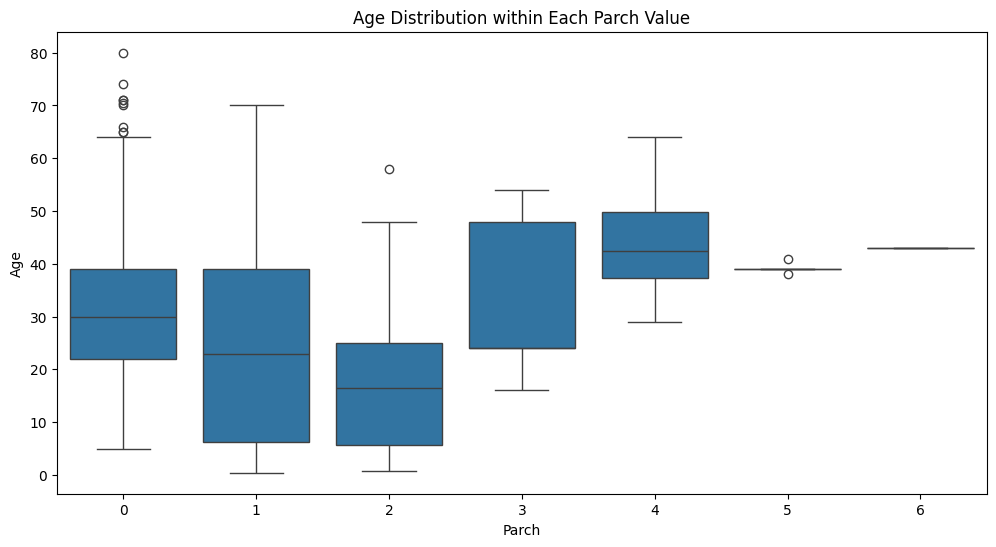

In [16]:
parch_age = titanic_passenger_data[['Parch','Age']]


plt.figure(figsize=(12, 6))
sns.boxplot(x='Parch', y='Age', data=parch_age)
plt.title('Age Distribution within Each Parch Value')
plt.xlabel('Parch')
plt.ylabel('Age')
plt.show()


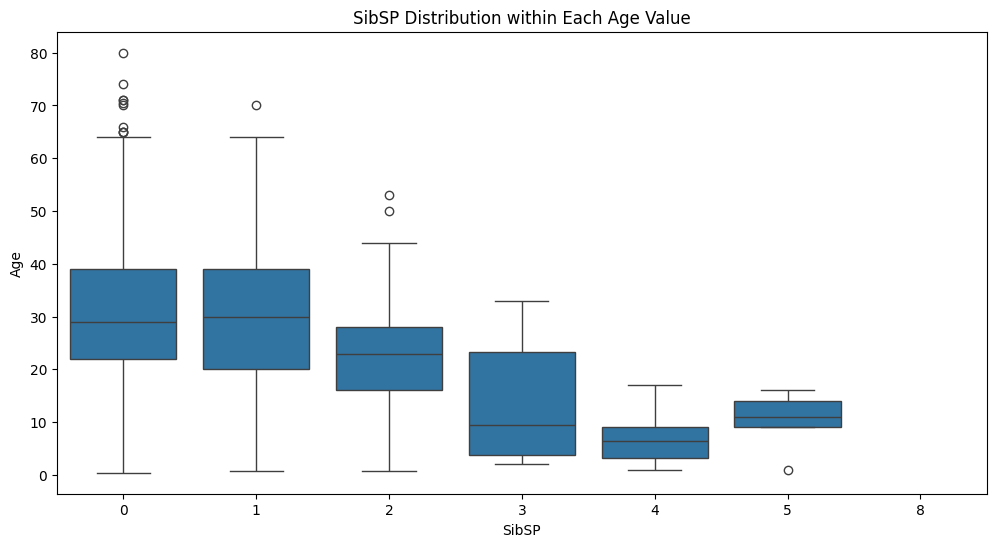

In [20]:
SibSp_age = titanic_passenger_data[['SibSp','Age']]


plt.figure(figsize=(12, 6))
sns.boxplot(x='SibSp', y='Age', data=SibSp_age)
plt.title('SibSP Distribution within Each Age Value')
plt.xlabel('SibSP')
plt.ylabel('Age')
plt.show()

#### **Parch Findings**:
- The age distribution for Parch = 1 is wide, with an average being in the early 20's, while Parch 2 has an average of being below 20.
- This is in paralell with our Harper example above
- As the Parch value goes higher, the age is older. Reflecting the head of households (Mothers, Fathers, Guardians).

#### **SibSp Findings**:
- We notice a lower age distribution for a SibSp value of >= 3, reflecting that within this bucket, this is most likely reflective of passengers traveling with siblings/younger siblings.


#### **Finding Conclusion:** Parch and SibSp are inverse of eachother. A higher Parch most likely reflects a passenger who is a parent, or guardian of another. Higher SibSp value is reflective of passengers traveling with siblings as they tend to be younger.

#### After having these definitions, and understand how both the Parch and SibSp columns operate, we can plot the data and see a general idea of Parch values respective to passenger class.

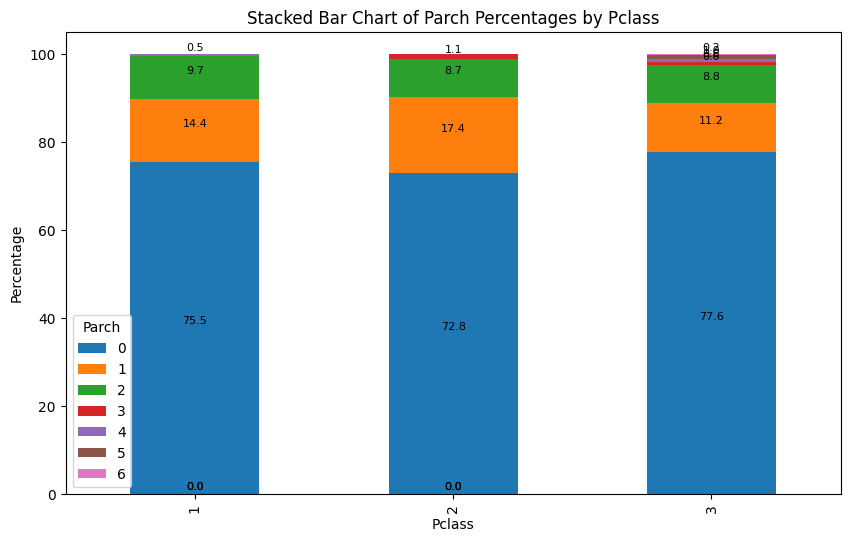

In [22]:
#Ploting the data

parch_chart = class_parch_group.reset_index(name = 'Count')

pivot_parch_chart = parch_chart.pivot(index='Pclass', columns='Parch', values='Count').fillna(0)

percentage_df = pivot_parch_chart.div(pivot_parch_chart.sum(axis=1), axis=0) * 100




plt.figure(figsize=(10, 6))
bar_plot = percentage_df.plot(kind='bar',stacked = True, ax=plt.gca())
for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_height(), '.1f'),
                      (bar.get_x() + bar.get_width() / 2,
                       bar.get_y() + bar.get_height() / 2),
                      ha='center', va='center',
                      size=8, xytext=(0, 5),
                      textcoords='offset points')

plt.title('Stacked Bar Chart of Parch Percentages by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Percentage')
plt.legend(title='Parch')
plt.show()


#### From the data above, we can have the following findings (Generalizations):
1. In all classes, there was a huge share of passengers with a Parch of 0
- This could be reflective of couples/older age siblings traveling together
- However, per the data dictionary, Parch of 0 **Also includes children traveling with nannies.** The illustration does not take this into account.

2. The second most populous group was with a Parch of 1.
- This can be reflective of children traveling with a chaperone **or** a single adult traveling with children (non-nanny) hence the grater variation within the distribution graph.

3. Parches with that are >= 3 indicate that these are older passengers, and are traveling with children, step children, or step brother/sister.

#### We will confirm these findings by creating a new column reflective of a a passenger's party list like so:
- **[Father,Age:| Mother, Age| Son, Age:| Daughter, Age]**
- Above is an example, from Left to right, the oldest of the party will be populated first



In [23]:
#Function to create Party List:
def passenger_party_list(group):
  sorted_group = group.sort_values(by='Age', ascending = False)
  party_list = '|'.join([f"{row['Name']} Age: {row['Age']}" for _, row in sorted_group.iterrows()])
  return party_list

In [24]:
#Apply the fucntion as a column
party_series = titanic_passenger_data.groupby('Ticket').apply(passenger_party_list)

titanic_passenger_data['Party'] = titanic_passenger_data['Ticket'].apply(lambda x: party_series.get(x, ''))

titanic_passenger_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Party
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris Age: 22.0"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina Age: 26.0"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mr. Jacques Heath Age: 37.0|Futrelle..."
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry Age: 35.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"Montvila, Rev. Juozas Age: 27.0"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"Graham, Miss. Margaret Edith Age: 19.0"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"Johnston, Mr. Andrew G Age: nan|Johnston, Miss..."
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"Behr, Mr. Karl Howell Age: 26.0"


#### We will use the "Party" Column to count each individuals in the list, and create a new column called "Party Size"

In [25]:
titanic_passenger_data['Party_Size'] = titanic_passenger_data['Party'].apply(lambda x: x.count('|') + 1)

titanic_passenger_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Party,Party_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris Age: 22.0",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina Age: 26.0",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mr. Jacques Heath Age: 37.0|Futrelle...",2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry Age: 35.0",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"Montvila, Rev. Juozas Age: 27.0",1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"Graham, Miss. Margaret Edith Age: 19.0",1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"Johnston, Mr. Andrew G Age: nan|Johnston, Miss...",2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"Behr, Mr. Karl Howell Age: 26.0",1


#### Now we can easily see which children had a Parch of 0 and were accompanied by a nanny by:
- Who had a party size >= 2
- Age is <15 (This is a starting point)
- Had a Perch of 0

In [26]:
nanny_data = titanic_passenger_data[(titanic_passenger_data['Parch'] == 0) &
                                      (titanic_passenger_data['Party_Size'] >= 2)&
                                      (titanic_passenger_data['Age'] <15)]
nanny_data

# Ticket number 364516 was accompanied by a nanny, ticket number 2699 was also accompanied by a nanny.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Party,Party_Size
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"Nasser, Mr. Nicholas Age: 32.5|Nasser, Mrs. Ni...",2
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,"Nicola-Yarred, Miss. Jamila Age: 14.0|Nicola-Y...",2
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,"Zabour, Miss. Hileni Age: 14.5|Zabour, Miss. T...",2
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C,"Nicola-Yarred, Miss. Jamila Age: 14.0|Nicola-Y...",2
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,"Albimona, Mr. Nassef Cassem Age: 26.0|Hassan, ...",2
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S,"Dowdell, Miss. Elizabeth Age: 30.0|Emanuel, Mi...",2


#### As we see, ticket numbers **36516** and **2699** were most likely traveling with nannies due to the following reasons:
- Last names do not match.
- Bigger age gap within the party.
- Parties are >= 2

#### Step 1 is completed. Now we will see by class, what was the average party size.

<ipython-input-29-5275a3129746>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_party_size['Party_Size'] = class_party_size['Party_Size'].astype('category')


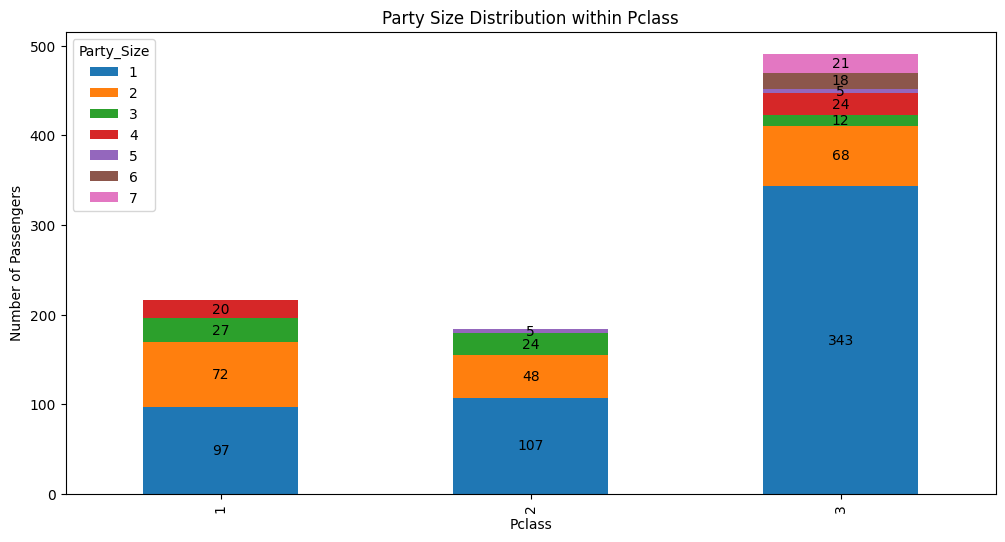

In [29]:
class_party_size = titanic_passenger_data[['Pclass', 'Party_Size']]

class_party_size['Party_Size'] = class_party_size['Party_Size'].astype('category')

grouped_data = class_party_size.groupby(['Pclass', 'Party_Size']).size().unstack(fill_value=0)


ax = grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Party Size Distribution within Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')

# Count Labels for Graph
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only add text if there is a count
        ax.text(x + width/2,
                y + height/2,
                int(height),
                horizontalalignment='center',
                verticalalignment='center')

plt.show()

## **Question 1 Answer**:
- First class passengers had a lower party size, second and third had a higher share of larger party size.
- For nannies, there were two nannies on board who accompanied children. This should not impact our data too much

#### **Question 2: Who were the survivors?**

##### By having the party size, we can identify on a party size level, who were the survivors.
- For this, we will bucket them by class, and create another column that will subtract from the Party column of who perished

In [34]:
#Create function that only makes a list of those part members who survived
def passenger_party_list_survived_only(group):
    sorted_group = group.sort_values(by='Age', ascending=False)
    # Joining only the names of passengers who survived
    party_list_survived = '|'.join([f"{row['Name']} Age: {row['Age']}"
                                    for _, row in sorted_group.iterrows()
                                    if row['Survived'] == 1])
    return party_list_survived


In [35]:
#Apply the fucntion as a new column
party_survived_series = titanic_passenger_data.groupby('Ticket').apply(passenger_party_list_survived_only)

titanic_passenger_data['Party_Survived'] = titanic_passenger_data['Ticket'].apply(lambda x: party_survived_series.get(x, ''))

titanic_passenger_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Party,Party_Size,Party_Survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris Age: 22.0",1,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina Age: 26.0",1,"Heikkinen, Miss. Laina Age: 26.0"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mr. Jacques Heath Age: 37.0|Futrelle...",2,"Futrelle, Mrs. Jacques Heath (Lily May Peel) A..."
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry Age: 35.0",1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"Montvila, Rev. Juozas Age: 27.0",1,
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"Graham, Miss. Margaret Edith Age: 19.0",1,"Graham, Miss. Margaret Edith Age: 19.0"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"Johnston, Mr. Andrew G Age: nan|Johnston, Miss...",2,
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"Behr, Mr. Karl Howell Age: 26.0",1,"Behr, Mr. Karl Howell Age: 26.0"


In [38]:
#Make another column called Party_Size_Survived
def count_survived_members(party_survived):
    # Count the number of survivors in the party
    if pd.isna(party_survived) or party_survived == '':
        return 0
    else:
        return len(party_survived.split('|'))

# Assuming titanic_passenger_data is your DataFrame and 'Party_Survived' is your list column
titanic_passenger_data['Party_Size_Survived'] = titanic_passenger_data['Party_Survived'].apply(count_survived_members)

titanic_passenger_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Party,Party_Size,Party_Survived,Party_Size_Survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris Age: 22.0",1,,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina Age: 26.0",1,"Heikkinen, Miss. Laina Age: 26.0",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mr. Jacques Heath Age: 37.0|Futrelle...",2,"Futrelle, Mrs. Jacques Heath (Lily May Peel) A...",1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry Age: 35.0",1,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"Montvila, Rev. Juozas Age: 27.0",1,,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"Graham, Miss. Margaret Edith Age: 19.0",1,"Graham, Miss. Margaret Edith Age: 19.0",1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"Johnston, Mr. Andrew G Age: nan|Johnston, Miss...",2,,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"Behr, Mr. Karl Howell Age: 26.0",1,"Behr, Mr. Karl Howell Age: 26.0",1


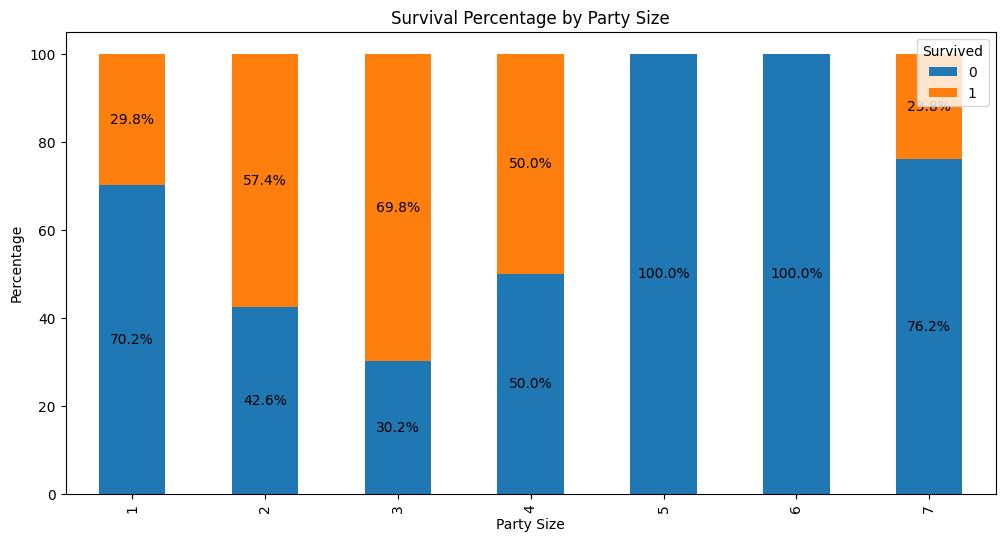

In [39]:
#Plot Data by party size who survived & did not survive:

grouped = titanic_passenger_data.groupby(['Party_Size', 'Survived']).size().unstack(fill_value=0)

total_passengers = grouped.sum(axis=1)

# Calculate the percentage
grouped_percentage = grouped.div(total_passengers, axis=0) * 100

#Plot Logic
ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Survival Percentage by Party Size')
plt.xlabel('Party Size')
plt.ylabel('Percentage')

# Add percentages:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only add text if there is a count
        ax.text(x + width/2,
                y + height/2,
                f'{height:.1f}%',
                horizontalalignment='center',
                verticalalignment='center')

plt.show()

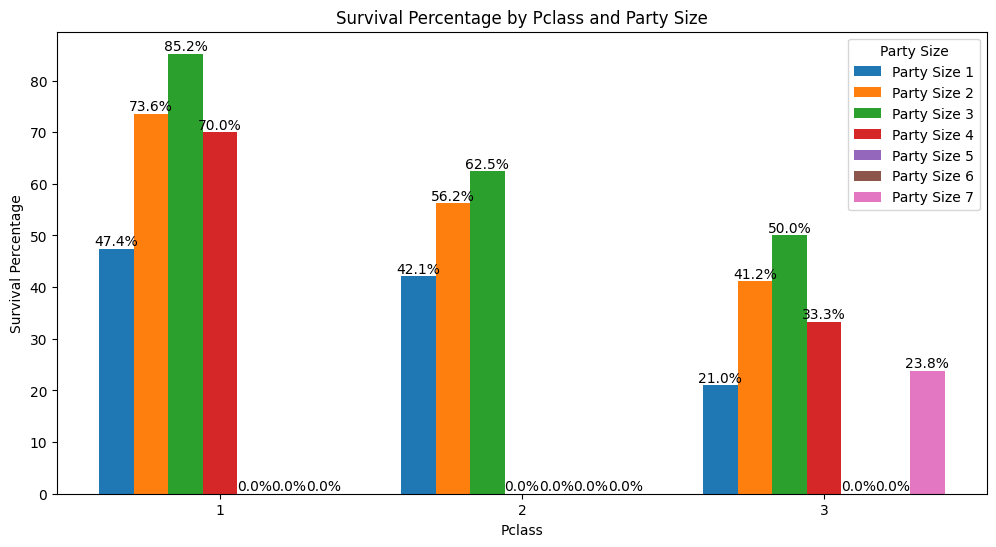

In [46]:
# Group by Pclass, Party_Size, and Survived
grouped = titanic_passenger_data.groupby(['Pclass', 'Party_Size', 'Survived']).size().unstack(fill_value=0)

# Calculate the total passengers by Pclass and Party_Size
total_passengers = grouped.sum(axis=1)

# Calculate the percentage
grouped_percentage = grouped.div(total_passengers, axis=0) * 100

# Get unique values for Pclass and Party_Size
pclasses = grouped_percentage.index.get_level_values(0).unique()
party_sizes = grouped_percentage.index.get_level_values(1).unique()


fig, ax = plt.subplots(figsize=(12, 6))

# Width of the bars
width = 0.8 / len(party_sizes)

# The x location groups
ind = np.arange(len(pclasses))

for i, size in enumerate(party_sizes):
    # Extract percentages for this party size across all Pclasses
    percentages = [grouped_percentage.loc[(cls, size), 1] if (cls, size) in grouped_percentage.index else 0 for cls in pclasses]

    # Set the position for the bar for this party size
    bar_positions = ind - (0.8 - width) / 2 + i * width

    # Plot
    ax.bar(bar_positions, percentages, width, label=f'Party Size {size}')

    # Adding value labels on top of each bar
    for j, cls in enumerate(pclasses):
        height = percentages[j]
        ax.text(bar_positions[j], height, f'{height:.1f}%', ha='center', va='bottom')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Pclass')
ax.set_ylabel('Survival Percentage')
ax.set_title('Survival Percentage by Pclass and Party Size')
ax.set_xticks(ind)
ax.set_xticklabels(pclasses)
ax.legend(title='Party Size')

plt.show()

#### **NOTE**:
- **1st Class only goes up to party size 4**
- **2nd Class only goes up to party size 5**
- **3rd Class goes up to party size 7**

## **Question 2 Answer**:
- **Party sizes of 3 had an overall higher percentage in surviving. Party size 3 or greater has a dramatic decrease in survivability**
- First Class passengers clearly had an advantage regardless of party size when compaired to second and third class


## **Question 3: What was the gender by class of the survivors?**
- Below is a simple visualization of the ratio of survivors by class, followed by age group

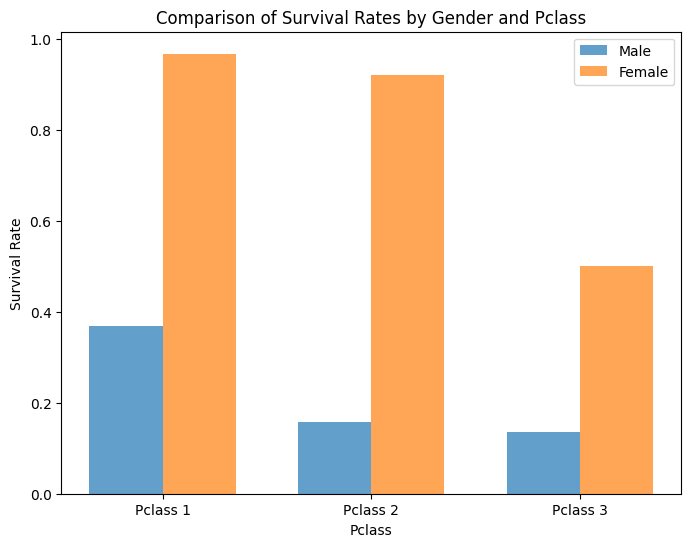

In [57]:
survival_rates = titanic_passenger_data.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Prepare data for plotting
pclasses = survival_rates.index.unique()
bar_width = 0.35
indices = np.arange(len(pclasses))

# Plotting
male_rates = survival_rates['male']
female_rates = survival_rates['female']

# Male bar positions
male_positions = indices - bar_width / 2

# Female bar positions
female_positions = indices + bar_width / 2

# Plot male and female survival rates
ax.bar(male_positions, male_rates, bar_width, label='Male', alpha=0.7)
ax.bar(female_positions, female_rates, bar_width, label='Female', alpha=0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Pclass')
ax.set_ylabel('Survival Rate')
ax.set_title('Comparison of Survival Rates by Gender and Pclass')
ax.set_xticks(indices)
ax.set_xticklabels(['Pclass ' + str(cls) for cls in pclasses])
ax.legend()

plt.show()

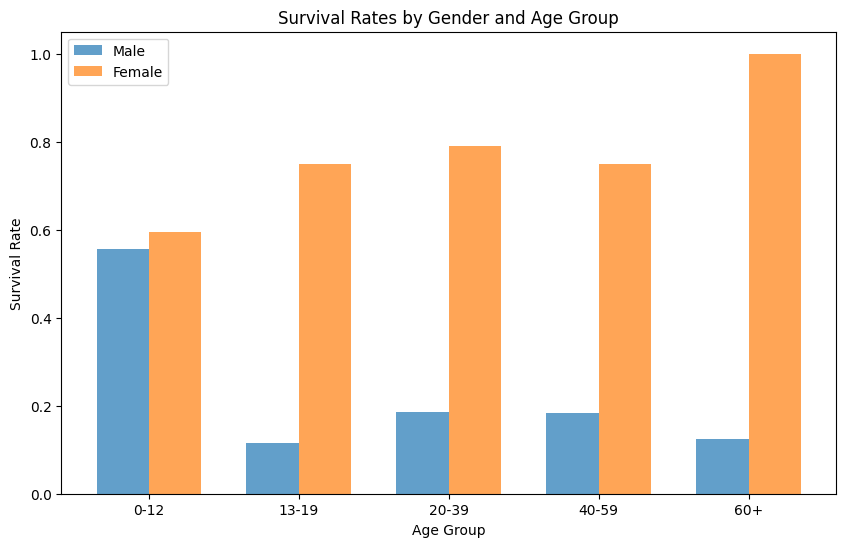

In [59]:
bins = [0, 12, 19, 39, 59, np.inf]
labels = ['0-12', '13-19', '20-39', '40-59', '60+']
titanic_passenger_data['Age_Group'] = pd.cut(titanic_passenger_data['Age'], bins=bins, labels=labels, right=False)

# Calculate survival rates by gender and age group
survival_rates = titanic_passenger_data.groupby(['Age_Group', 'Sex'])['Survived'].mean().unstack()

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data for plotting
age_groups = survival_rates.index.unique()
bar_width = 0.35
indices = np.arange(len(age_groups))

# Plotting
male_rates = survival_rates['male']
female_rates = survival_rates['female']

# Male bar positions
male_positions = indices - bar_width / 2

# Female bar positions
female_positions = indices + bar_width / 2

# Plot male and female survival rates
ax.bar(male_positions, male_rates, bar_width, label='Male', alpha=0.7)
ax.bar(female_positions, female_rates, bar_width, label='Female', alpha=0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Age Group')
ax.set_ylabel('Survival Rate')
ax.set_title('Survival Rates by Gender and Age Group')
ax.set_xticks(indices)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

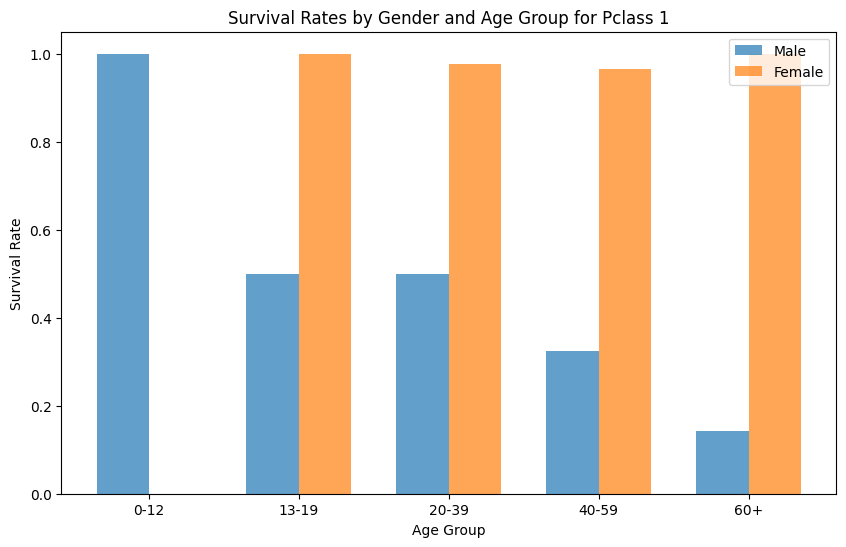

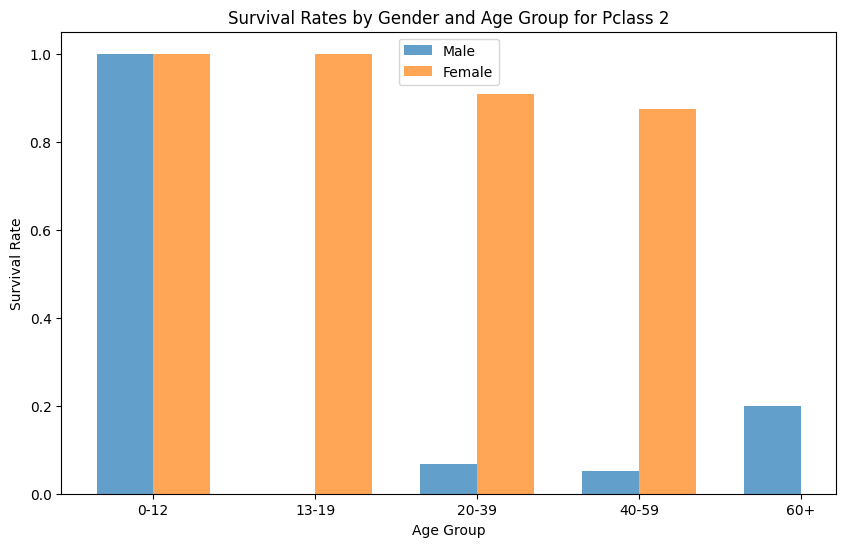

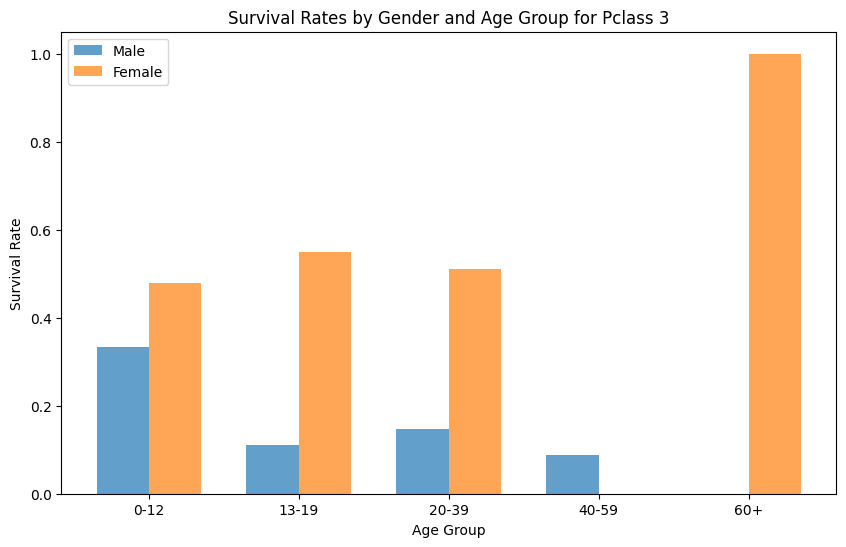

In [67]:
#Make age bins for graph
bins = [0, 12, 19, 39, 59, np.inf]
labels = ['0-12', '13-19', '20-39', '40-59', '60+']
titanic_passenger_data['Age_Group'] = pd.cut(titanic_passenger_data['Age'], bins=bins, labels=labels, right=False)

pclasses = sorted(titanic_passenger_data['Pclass'].unique())

# Use a for loop to create multiple graphs
for pclass in pclasses:
    # Filter data by Pclass
    data_filtered = titanic_passenger_data[titanic_passenger_data['Pclass'] == pclass]

    # Calculate survival rates by gender and age group
    survival_rates = data_filtered.groupby(['Age_Group', 'Sex'])['Survived'].mean().unstack()

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Prepare data for plotting
    age_groups = survival_rates.index.unique()
    bar_width = 0.35
    indices = np.arange(len(age_groups))

    male_rates = survival_rates['male']
    female_rates = survival_rates['female']

    # Male bar positions
    male_positions = indices - bar_width / 2

    # Female bar positions
    female_positions = indices + bar_width / 2

    # Plot male and female survival rates
    ax.bar(male_positions, male_rates, bar_width, label='Male', alpha=0.7)
    ax.bar(female_positions, female_rates, bar_width, label='Female', alpha=0.7)

    # labels.
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Survival Rate')
    ax.set_title(f'Survival Rates by Gender and Age Group for Pclass {pclass}')
    ax.set_xticks(indices)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

## **Question 3 Answer**:
- Across all classes, females and young children had the higher chance of survivability, hence the policy of "women and children first".
- Out of the males, 1st class males had a much higher (but still low) survival rate (overall).
- We still see a drop off in survivability for 3rd class passengers.
